# Exploratory Data Analysis

## Intial setup

### Required libraries

In [1]:
import pandas as pd
from collections import Counter
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread

import statistics 

### CheXpert dataset

In [2]:
train_data = pd.read_csv("../../data_shares/purrlab/CheXpert/CheXpert-v1.0-small/train.csv", index_col=0)

In [130]:
train_data

,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,AgeGroup
Path,,,,,,,,,,,,,,,,,,,
CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,60-69
CheXpert-v1.0-small/train/patient00002/study2/view1_frontal.jpg,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,80-89
CheXpert-v1.0-small/train/patient00002/study1/view1_frontal.jpg,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,80-89
CheXpert-v1.0-small/train/patient00002/study1/view2_lateral.jpg,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,80-89
CheXpert-v1.0-small/train/patient00003/study1/view1_frontal.jpg,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CheXpert-v1.0-small/train/patient64537/study2/view1_frontal.jpg,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,NaN,50-59
CheXpert-v1.0-small/train/patient64537/study1/view1_frontal.jpg,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,-1.0,NaN,-1.0,NaN,NaN,NaN,50-59
CheXpert-v1.0-small/train/patient64538/study1/view1_frontal.jpg,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-9


## The shape of the data

In [82]:
num_observations, num_features = train_data.shape

print("The size of the data:")
print(f"\t - The number of observations (rows) is {num_observations}.")
print(f"\t - The number of features (columns) is {num_features}.")

The size of the data:
	 - The number of observations (rows) is 223414.
	 - The number of features (columns) is 18.


In [83]:
print("The type of the data:\n")
print(train_data.dtypes)

The type of the data:

Sex                            object
Age                             int64
Frontal/Lateral                object
AP/PA                          object
No Finding                    float64
Enlarged Cardiomediastinum    float64
Cardiomegaly                  float64
Lung Opacity                  float64
Lung Lesion                   float64
Edema                         float64
Consolidation                 float64
Pneumonia                     float64
Atelectasis                   float64
Pneumothorax                  float64
Pleural Effusion              float64
Pleural Other                 float64
Fracture                      float64
Support Devices               float64
dtype: object


In [84]:
print("Checking for the number of missing values:\n")
print(train_data.isnull().sum())

Checking for the number of missing values:

Sex                                0
Age                                0
Frontal/Lateral                    0
AP/PA                          32387
No Finding                    201033
Enlarged Cardiomediastinum    178575
Cardiomegaly                  177211
Lung Opacity                  105636
Lung Lesion                   211470
Edema                         137458
Consolidation                 152792
Pneumonia                     195806
Atelectasis                   154971
Pneumothorax                  144480
Pleural Effusion               90203
Pleural Other                 216922
Fracture                      211220
Support Devices               100197
dtype: int64


#### NOTE: we need to handle the missing values by replacing them with 0?? or maybe droping the rows?


## Summary of the data

In [85]:
numerical_data = train_data.select_dtypes(include=['int64', 'float64'])

print("Analysis of the numerical variables:")
display(numerical_data.describe().round(2))

Analysis of the numerical variables:


,Age,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
count,223414.00,22381.0,44839.00,46203.00,117778.00,11944.00,85956.00,70622.00,27608.00,68443.00,78934.00,133211.00,6492.00,12194.00,123217.00
mean,60.43,1.0,-0.04,0.41,0.85,0.64,0.46,-0.18,-0.46,-0.01,0.21,0.56,0.13,0.69,0.93
std,17.82,0.0,0.72,0.77,0.47,0.69,0.74,0.75,0.83,0.99,0.49,0.65,0.97,0.57,0.28
min,0.00,1.0,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
25%,49.00,1.0,-1.00,0.00,1.00,1.00,0.00,-1.00,-1.00,-1.00,0.00,0.00,-1.00,0.00,1.00
50%,62.00,1.0,0.00,1.00,1.00,1.00,1.00,0.00,-1.00,0.00,0.00,1.00,1.00,1.00,1.00
75%,74.00,1.0,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00
max,90.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


NOTE: age 0

In [86]:
print("Skewness of the numerical variables:\n")
print(numerical_data.skew())
# print(f"Kurtosis: \n{numerical_data.kurtosis()}")

Skewness of the numerical variables:

Age                          -0.370828
No Finding                    0.000000
Enlarged Cardiomediastinum    0.053066
Cardiomegaly                 -0.847910
Lung Opacity                 -3.142095
Lung Lesion                  -1.656898
Edema                        -0.961721
Consolidation                 0.316429
Pneumonia                     1.031305
Atelectasis                   0.010606
Pneumothorax                  0.389416
Pleural Effusion             -1.180808
Pleural Other                -0.270253
Fracture                     -1.651412
Support Devices              -4.541282
dtype: float64


In [87]:
print("Kurtosis of the numerical variables:\n")
print(numerical_data.kurtosis())

Kurtosis of the numerical variables:

Age                           -0.537289
No Finding                     0.000000
Enlarged Cardiomediastinum    -1.062070
Cardiomegaly                  -0.806238
Lung Opacity                   8.730310
Lung Lesion                    1.118068
Edema                         -0.543524
Consolidation                 -1.187582
Pneumonia                     -0.749605
Atelectasis                   -1.980156
Pneumothorax                   0.091392
Pleural Effusion               0.198682
Pleural Other                 -1.874415
Fracture                       1.712050
Support Devices               21.795485
dtype: float64


## Individual variables

Histogram and boxplot for numerical variables:


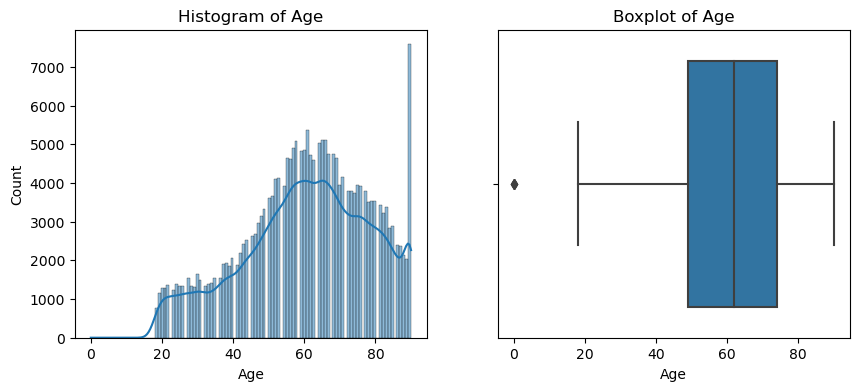

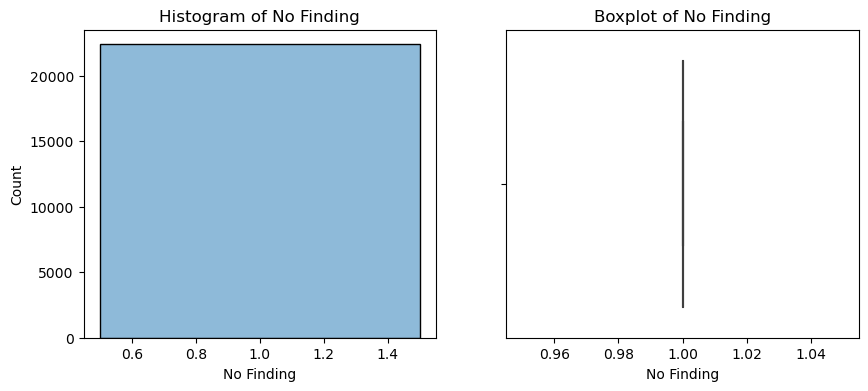

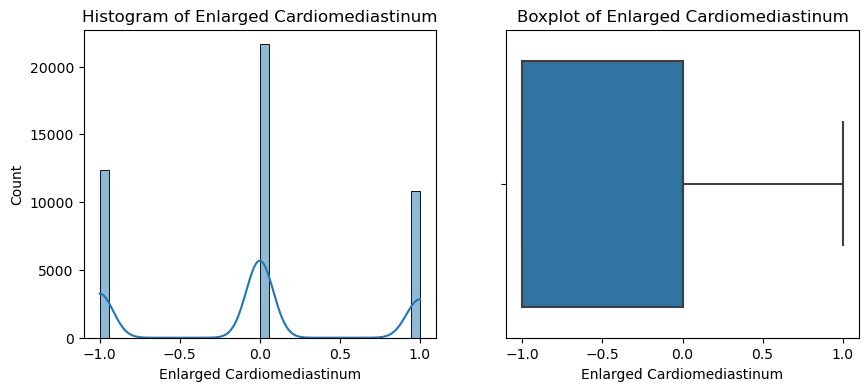

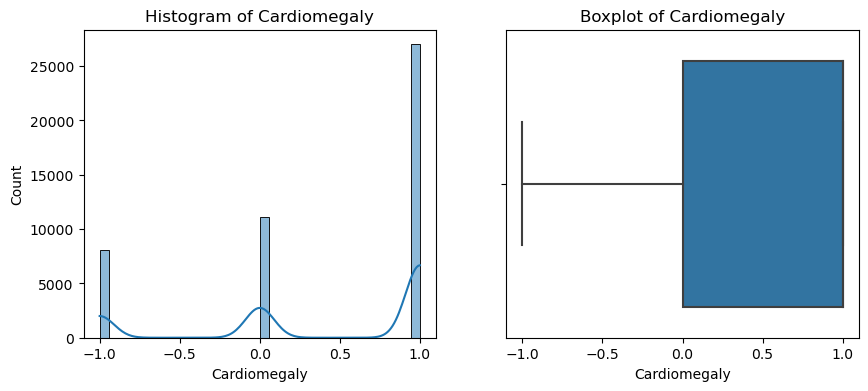

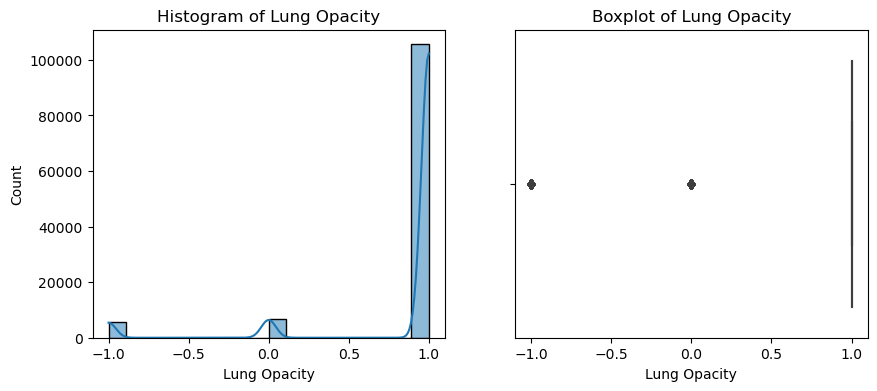

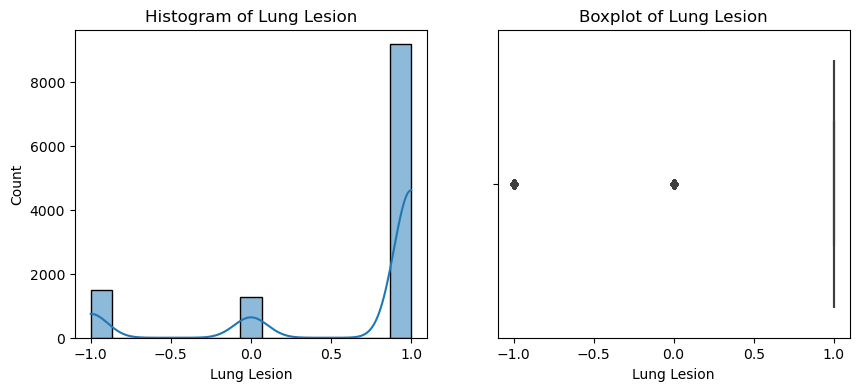

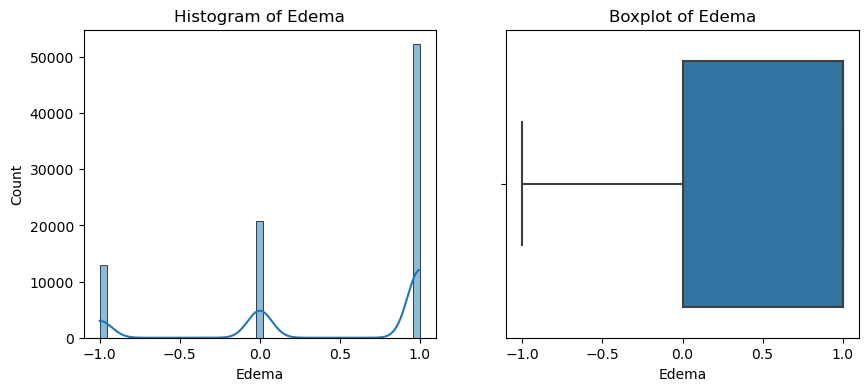

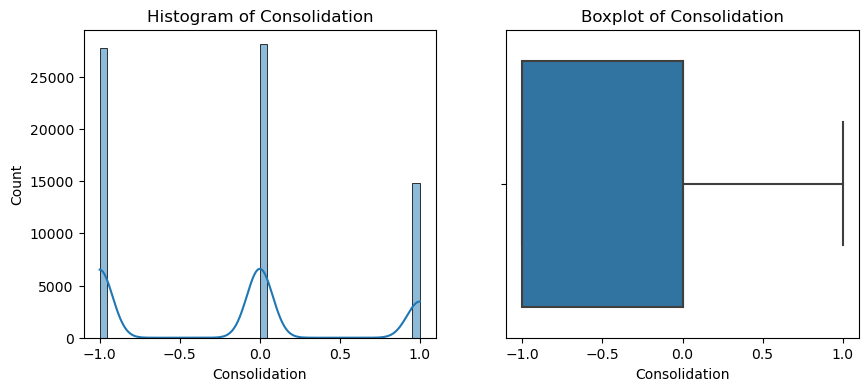

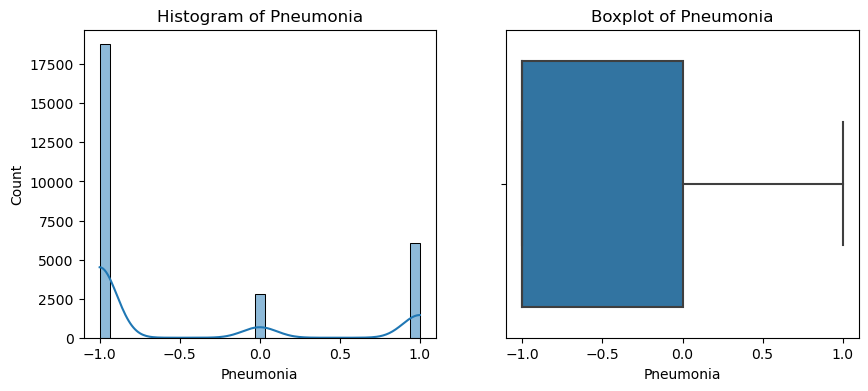

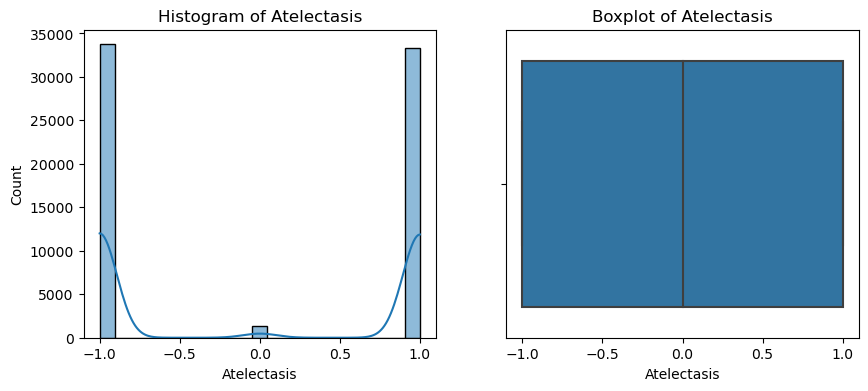

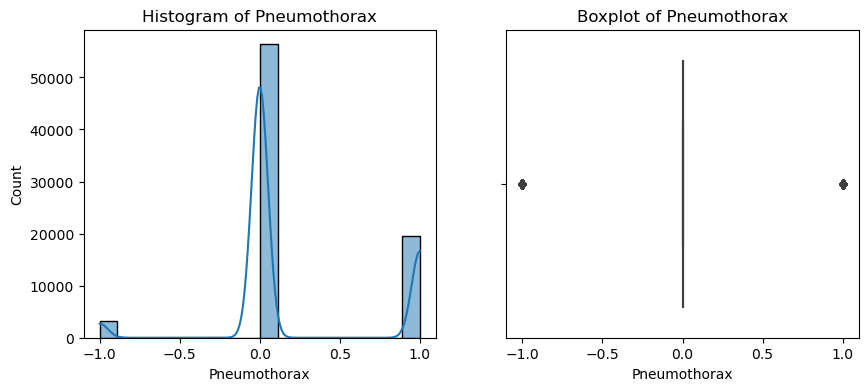

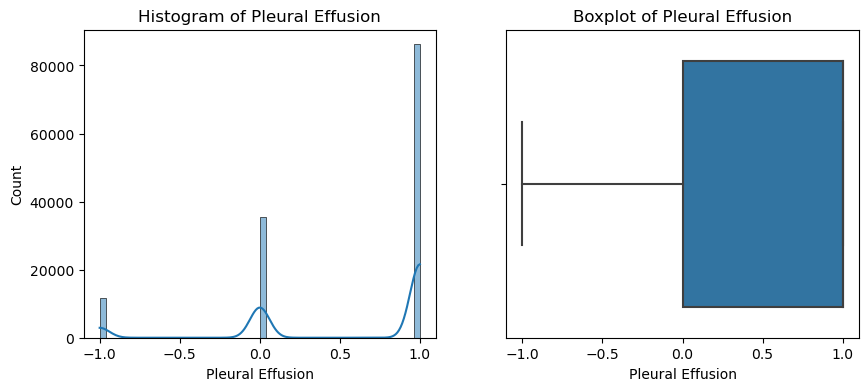

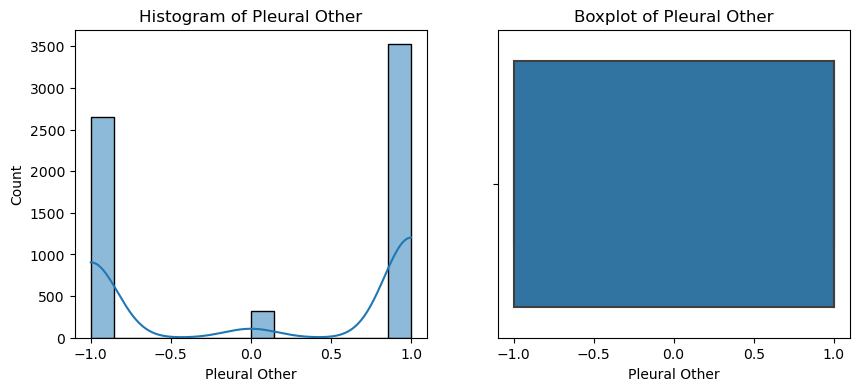

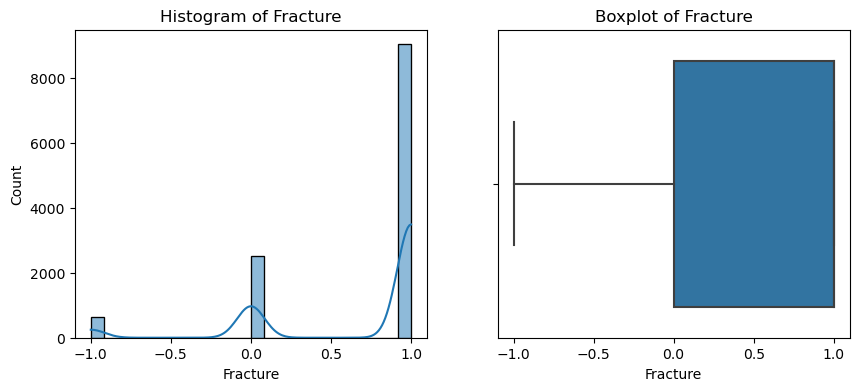

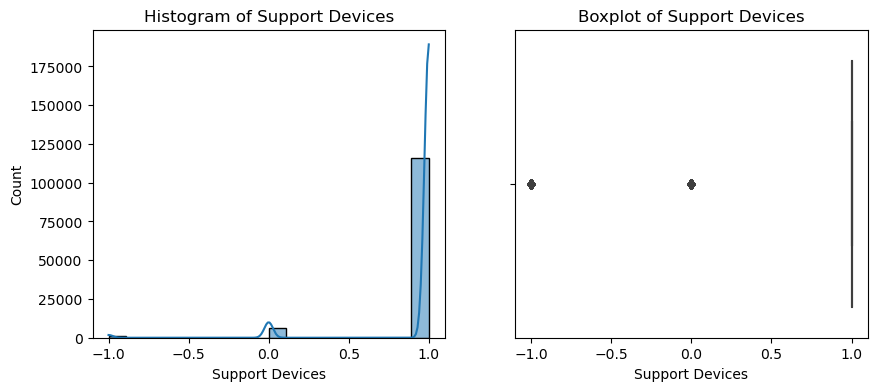

In [88]:
print("Histogram and boxplot for numerical variables:")

for column in numerical_data.columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(numerical_data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=numerical_data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

Barchart for categorical variables:


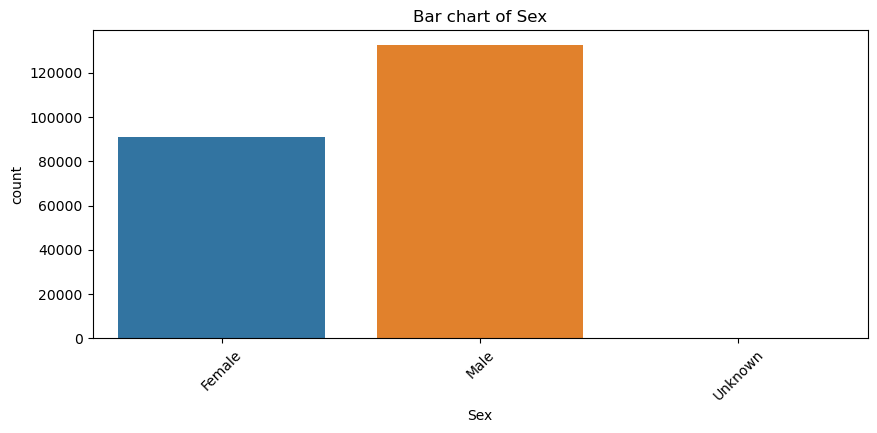

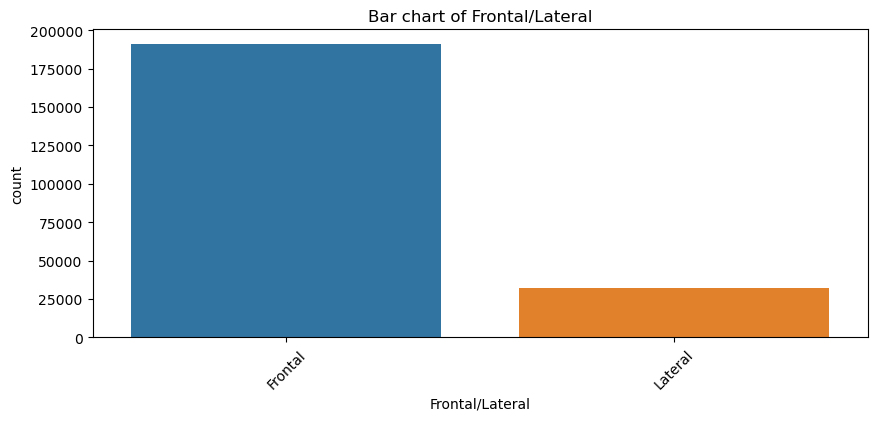

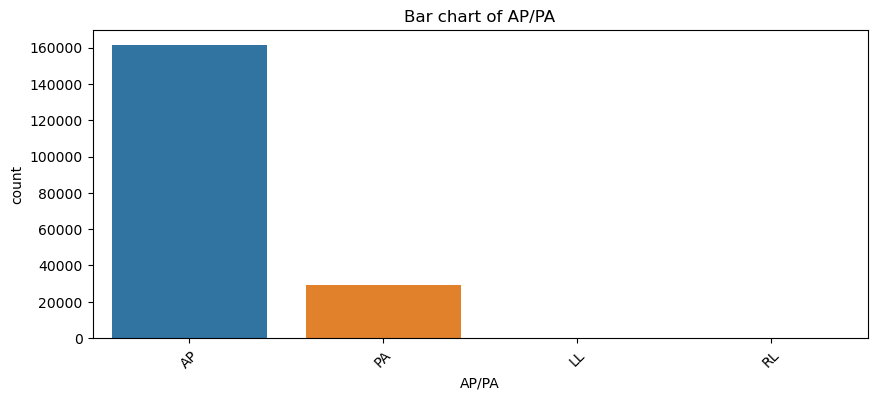

In [89]:
print("Barchart for categorical variables:")

categorical_data = train_data.select_dtypes(include=['object'])
for column in categorical_data.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=categorical_data[column])
    plt.title(f'Bar chart of {column}')
    plt.xticks(rotation=45)
    plt.show()

### In depth: 'Sex'

In [110]:
sex_counts = Counter(train_data["Sex"])

print("Counting the occurrences of each gender:")
for sex, count in sex_counts.items():
    print(f"{sex}: {count}")

Counting the occurrences of each gender:
Female: 90777
Male: 132636
Unknown: 1


Plotting the percentages of each gender:


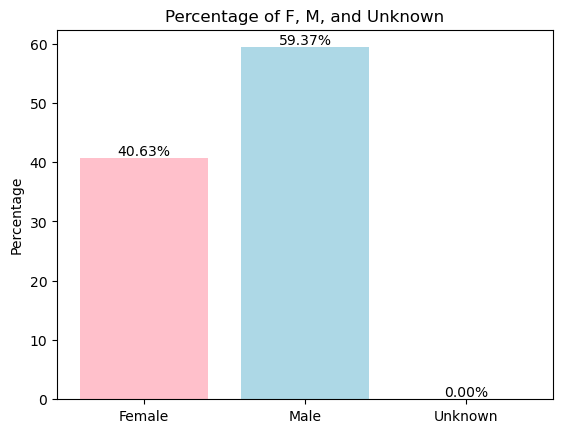

In [118]:
print("Plotting the percentages of each gender:")

total = sum(sex_counts.values())
sex_percentages = {k: (v / total) * 100 for k, v in sex_counts.items()}

fig, ax = plt.subplots()
ax.bar(sex_percentages.keys(), sex_percentages.values(), color=['pink', 'lightblue', 'gray'])

for i, (label, percent) in enumerate(sex_percentages.items()):
    ax.text(i, percent, f"{percent:.2f}%", ha='center', va='bottom')

ax.set_ylabel('Percentage')
ax.set_title('Percentage of F, M, and Unknown')

plt.show()

### In depth: Age

In [121]:
print(len([i for i in train_data["Age"] if i<2]), "Children under the age of two")

3 Children under the age of two


In [123]:
bins = [0,10,20,30,40,50,60,70,80,90,110]
labels = ['0-9', '10-19','20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)

In [125]:
age = train_data.groupby(["AgeGroup"]).size().reset_index()
age = age.rename(columns={0: "Count"})
age["Percentage"] = (age['Count'] / age['Count'].sum()) * 100
age

,AgeGroup,Count,Percentage
0,0-9,3,0.001343
1,10-19,1933,0.865210
2,20-29,13408,6.001414
3,30-39,16036,7.177706
4,40-49,25824,11.558810
5,50-59,43450,19.448199
6,60-69,48877,21.877322
7,70-79,38117,17.061151
8,80-89,28187,12.616488
9,90+,7579,3.392357


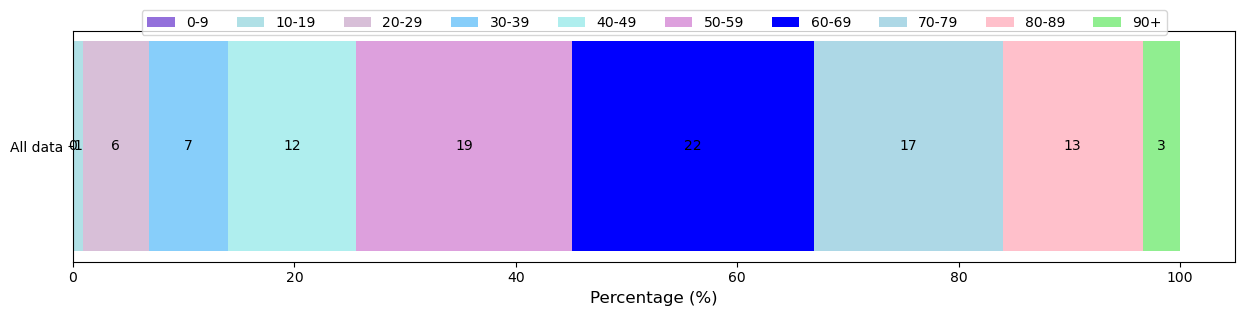

In [126]:

g1 = age["Percentage"][0]
g2 = age["Percentage"][1]
g3 = age["Percentage"][2]
g4 = age["Percentage"][3]
g5 = age["Percentage"][4]
g6 = age["Percentage"][5]
g7 = age["Percentage"][6]
g8 = age["Percentage"][7]
g9 = age["Percentage"][8]
g10 = age["Percentage"][9]


x = ["All data"]

fig, ax = plt.subplots(figsize=(15,3))
p1 = ax.barh(x, g1, color='mediumpurple', label=age["AgeGroup"][0])
p2 = ax.barh(x, g2, left=(g1), color='powderblue', label=age["AgeGroup"][1])
p3 = ax.barh(x, g3, left=(g1+g2), color='thistle', label=age["AgeGroup"][2])
p4 = ax.barh(x, g4, left=(g1+g2+g3), color='lightskyblue', label=age["AgeGroup"][3])
p5 = ax.barh(x, g5, left=(g1+g2+g3+g4), color='paleturquoise', label=age["AgeGroup"][4])
p6 = ax.barh(x, g6, left=(g1+g2+g3+g4+g5), color='plum', label=age["AgeGroup"][5])
p7 = ax.barh(x, g7, left=(g1+g2+g3+g4+g5+g6), color='blue', label=age["AgeGroup"][6])
p8 = ax.barh(x, g8, left=(g1+g2+g3+g4+g5+g6+g7), color='lightblue', label=age["AgeGroup"][7])
p9 = ax.barh(x, g9, left=(g1+g2+g3+g4+g5+g6+g7+g8), color='pink', label=age["AgeGroup"][8])
p10 = ax.barh(x, g10, left=(g1+g2+g3+g4+g5+g6+g7+g8+g9), color='lightgreen', label=age["AgeGroup"][9])



ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=10, fancybox=True)#, shadow=True)

ax.set_xlabel("Percentage (%)", fontsize=12)

ax.bar_label(p1, label_type='center', fmt='%.0f')
ax.bar_label(p2, label_type='center', fmt='%.0f')
ax.bar_label(p3, label_type='center', fmt='%.0f')
ax.bar_label(p4, label_type='center', fmt='%.0f')
ax.bar_label(p5, label_type='center', fmt='%.0f')
ax.bar_label(p6, label_type='center', fmt='%.0f')
ax.bar_label(p7, label_type='center', fmt='%.0f')
ax.bar_label(p8, label_type='center', fmt='%.0f')
ax.bar_label(p9, label_type='center', fmt='%.0f')
ax.bar_label(p10, label_type='center', fmt='%.0f')


plt.savefig("Distribution_sex", bbox_inches="tight")

plt.show()

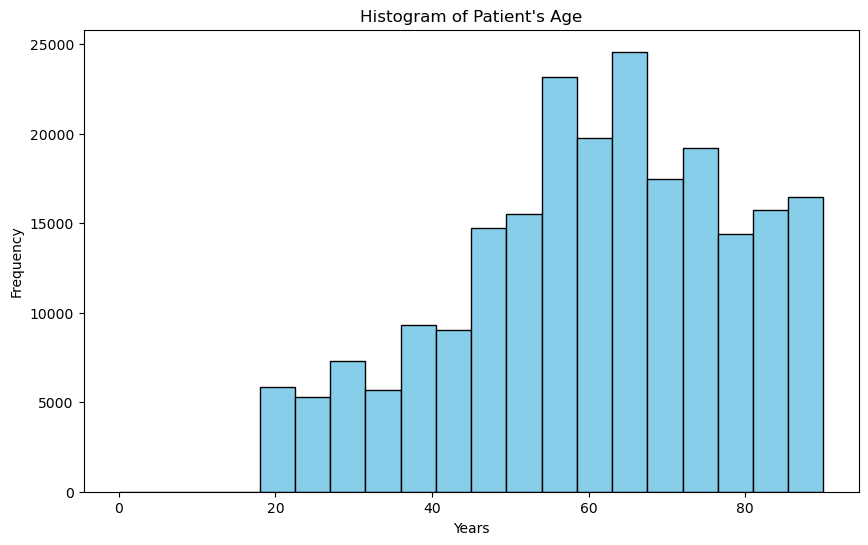

In [127]:
# Sample data: Replace 'your_column_name' with the actual column name you wish to plot
Age = data['Age']

plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size as needed
plt.hist(Age, bins=20, color='skyblue', edgecolor='black')  # You can adjust the number of bins and colors
plt.title('Histogram of Patient\'s Age')  # Add a title
plt.xlabel('Years')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label

plt.show()

<Axes: xlabel='AgeGroup'>

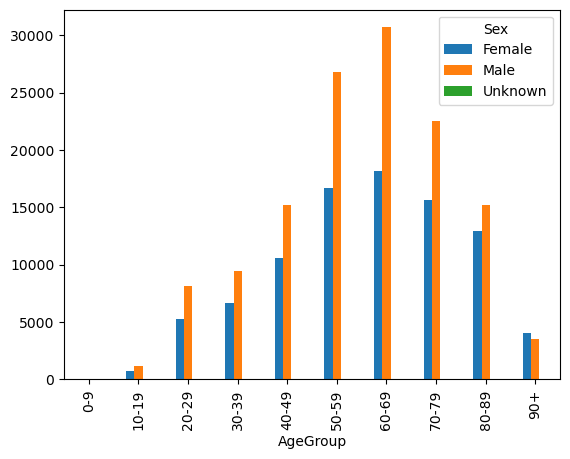

In [129]:
pd.crosstab(train_data['AgeGroup'],train_data['Sex']).plot.bar()

## Relationship between variables

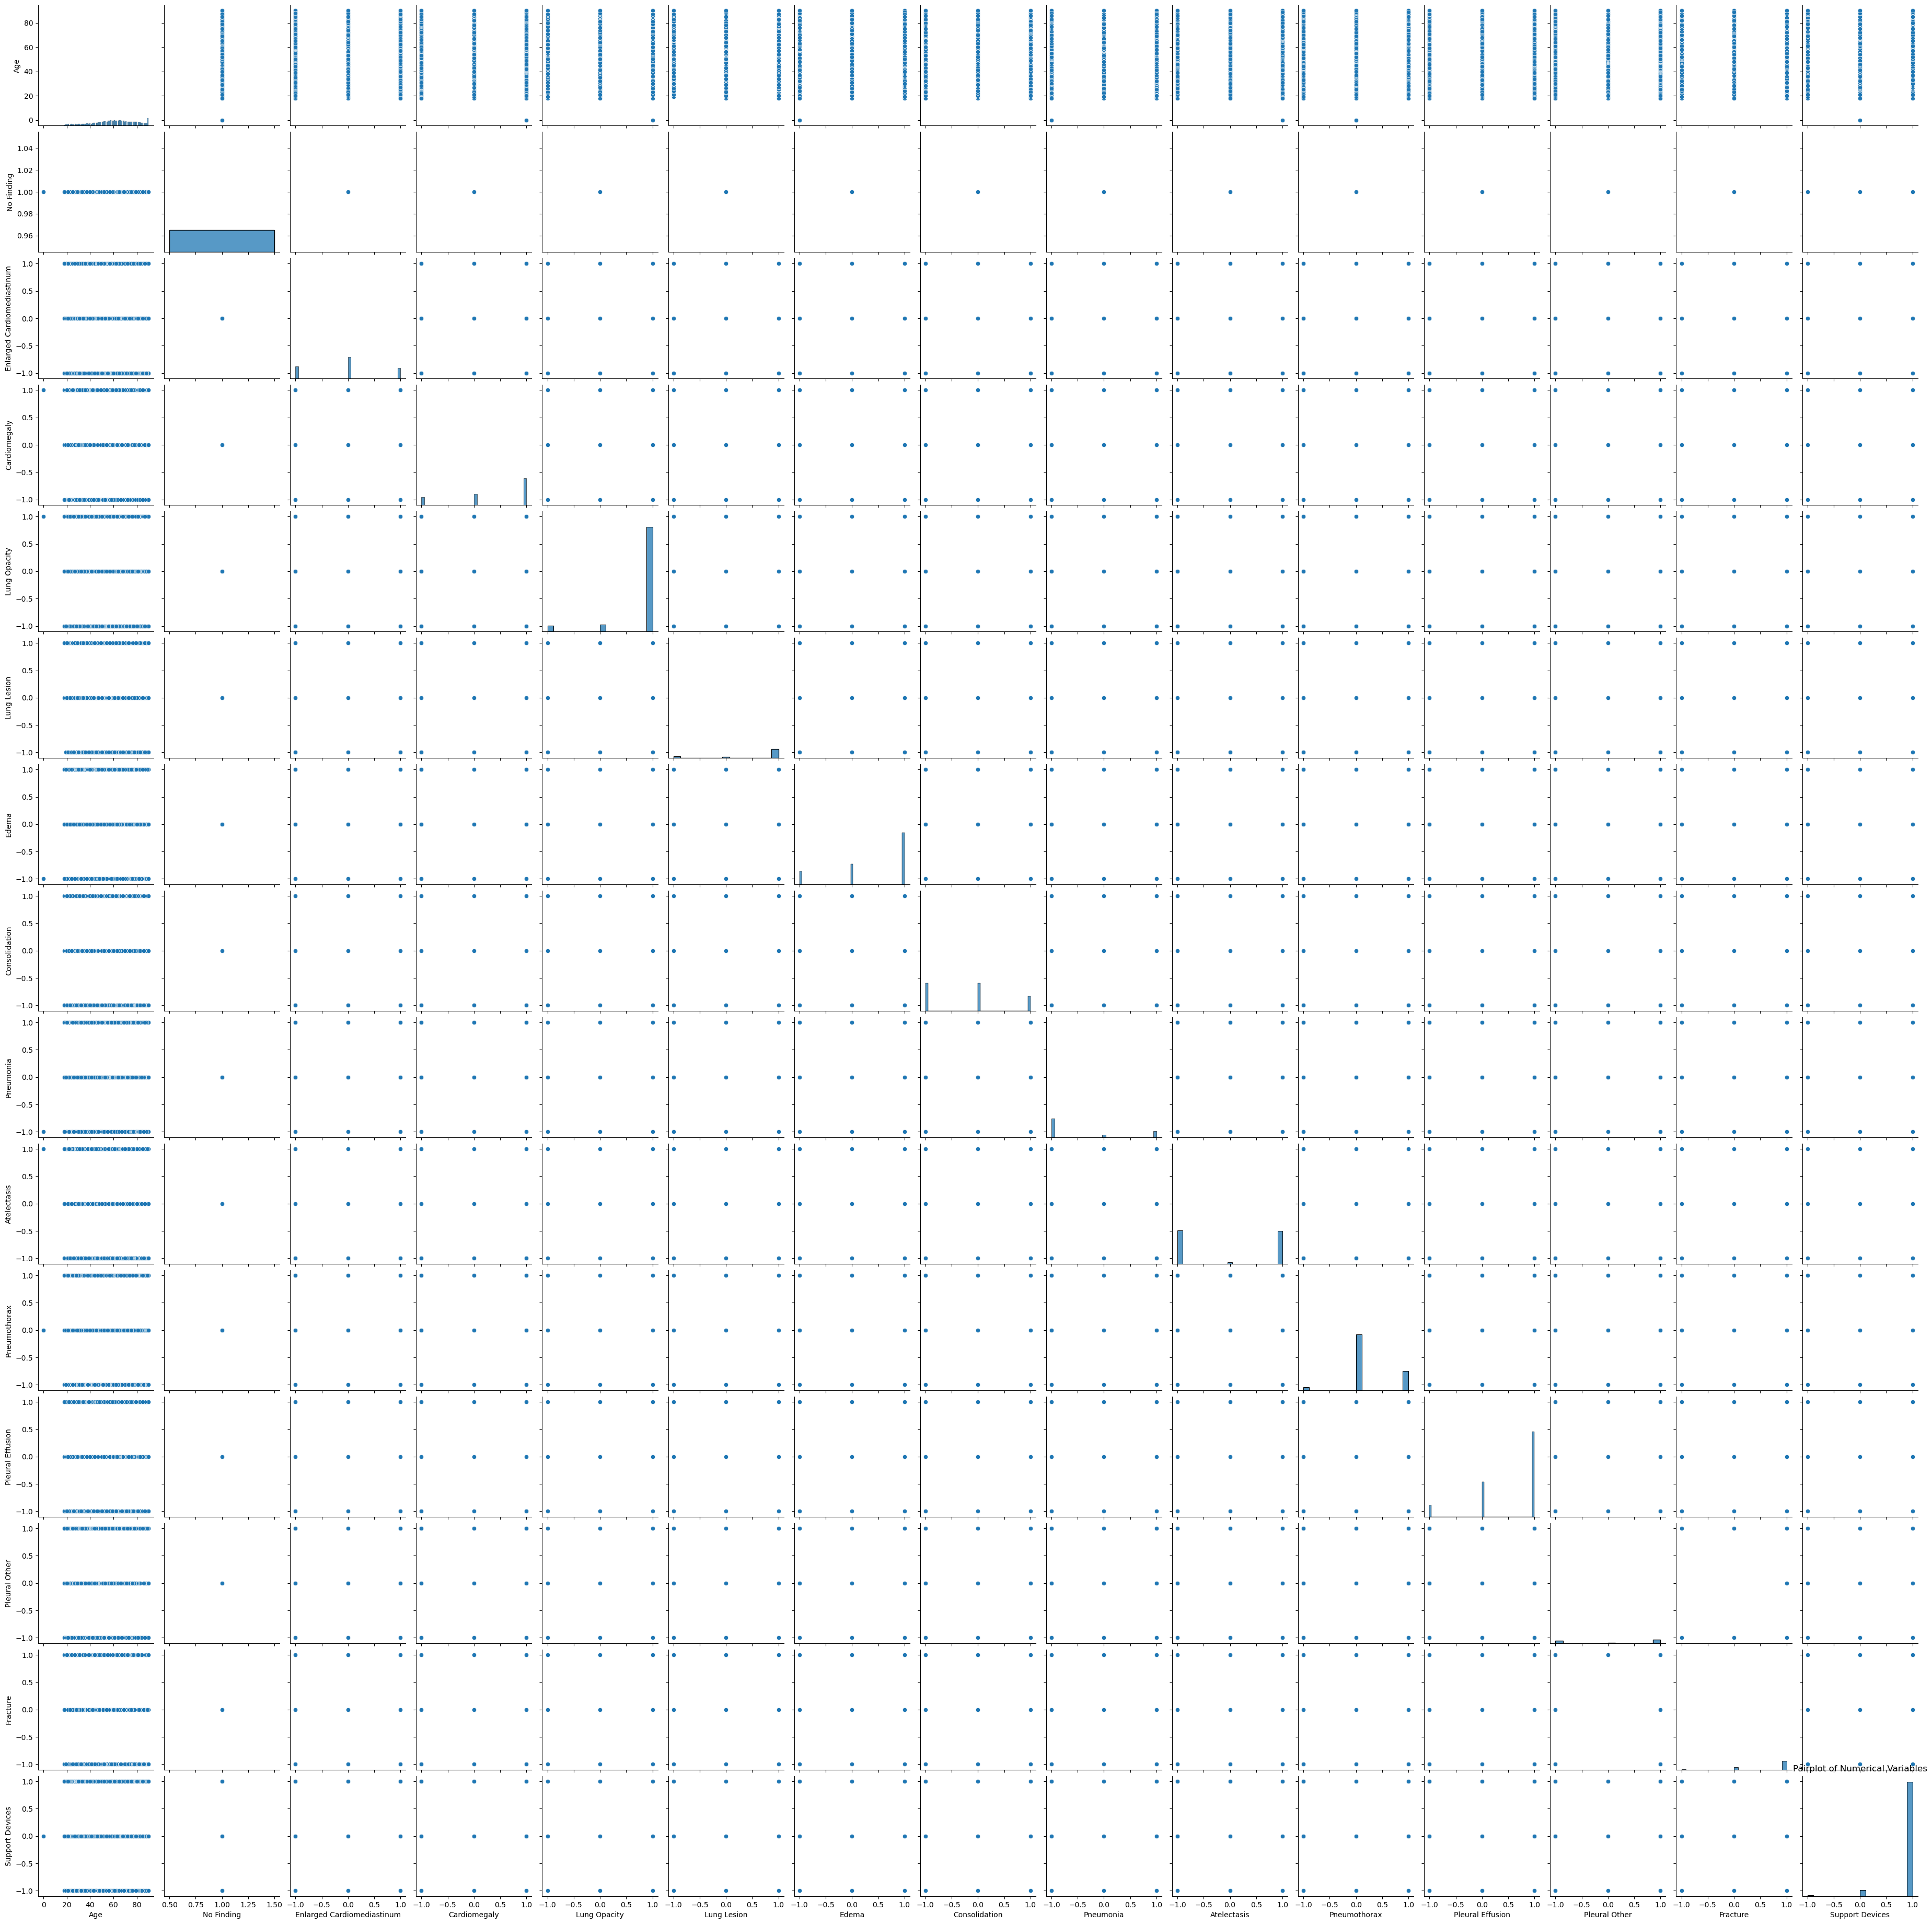

In [90]:
##trying to find potential connections tal vez... or correlation matrix!!

sns.pairplot(numerical_data)
plt.title('Pairplot of Numerical Variables')
plt.show()

The correlation matrix:


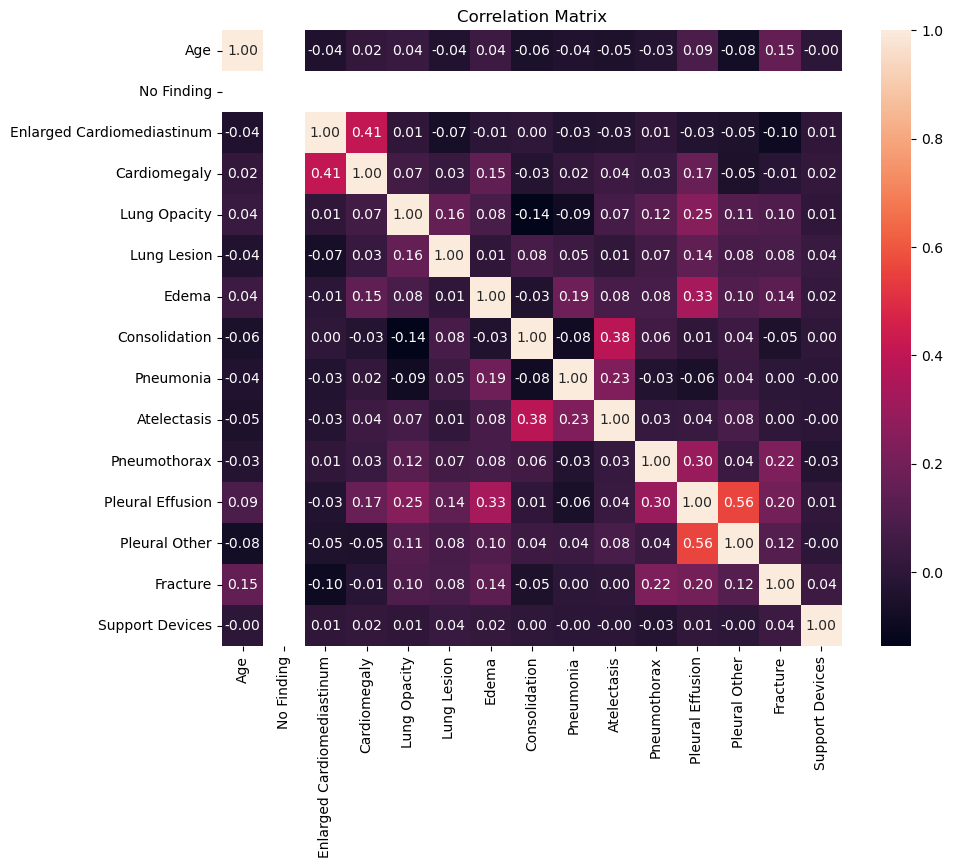

In [91]:
print("The correlation matrix:")

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### **5.  Patterns or anomalies**

- Look for outliers, unusual observations, or patterns in your data through plots and statistical summaries.
- Investigate any anomalies to understand their cause — they could be data entry errors, exceptional cases, or important discoveries.

## Visualizing the chest X-rays


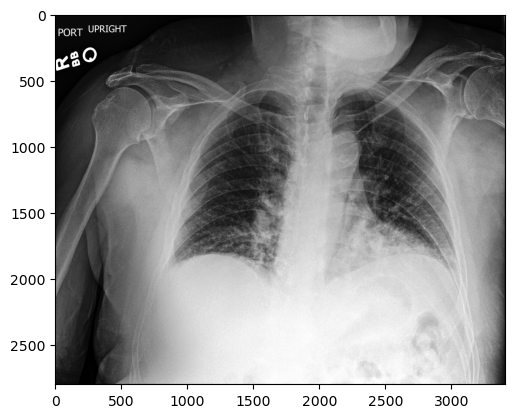

In [5]:
img_id = "view1_frontal.jpg"
img_dir = "patient64813/study1"
img_path = '../../data_shares/purrlab/CheXpert/chexlocalize/CheXpert/test/' + img_dir + '/' + img_id
img = imread(img_path)

plt.imshow(img, cmap='gray')
plt.show()

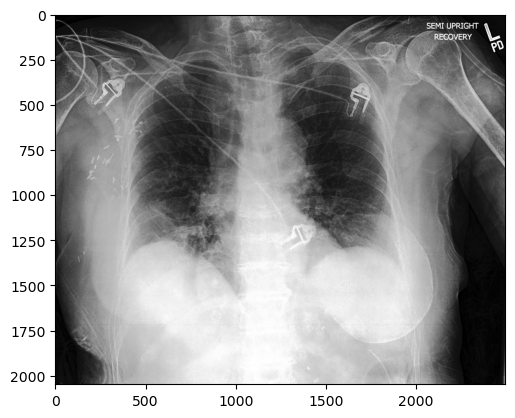

In [6]:
img_id = "view1_frontal.jpg"
img_dir = "patient64742/study1"
img_path = '../../data_shares/purrlab/CheXpert/chexlocalize/CheXpert/test/' + img_dir + '/' + img_id
img = imread(img_path)

plt.imshow(img, cmap='gray')
plt.show()

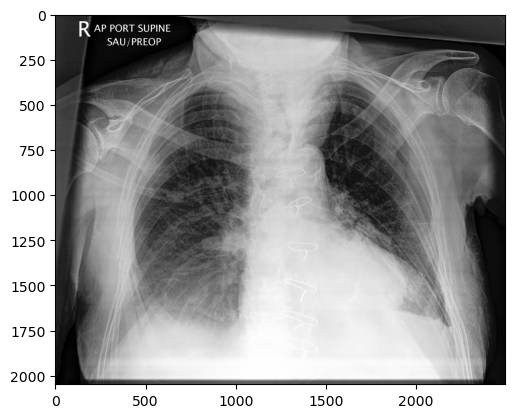

In [7]:
img_id = "view1_frontal.jpg"
img_dir = "patient64743/study1"
img_path = '../../data_shares/purrlab/CheXpert/chexlocalize/CheXpert/test/' + img_dir + '/' + img_id
img = imread(img_path)

plt.imshow(img, cmap='gray')
plt.show()

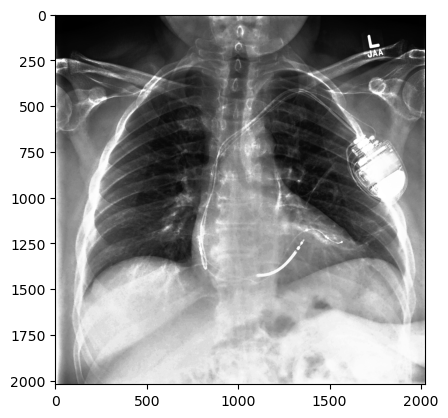

In [8]:
img_id = "view1_frontal.jpg"
img_dir = "patient64744/study1"
img_path = '../../data_shares/purrlab/CheXpert/chexlocalize/CheXpert/test/' + img_dir + '/' + img_id
img = imread(img_path)

plt.imshow(img, cmap='gray')
plt.show()

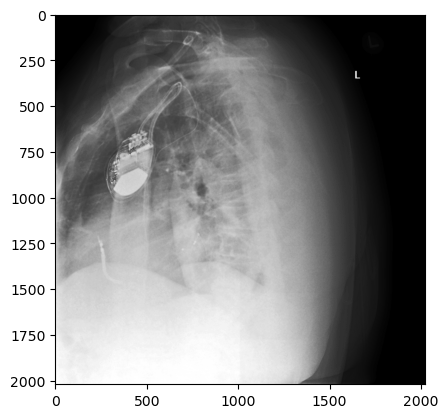

In [10]:
img_id = "view2_lateral.jpg"
img_dir = "patient64744/study1"
img_path = '../../data_shares/purrlab/CheXpert/chexlocalize/CheXpert/test/' + img_dir + '/' + img_id
img = imread(img_path)

plt.imshow(img, cmap='gray')
plt.show()

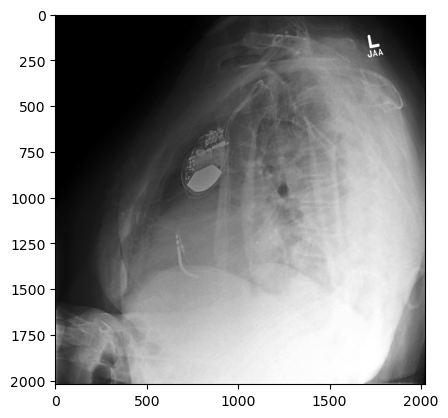

In [9]:
img_id = "view3_lateral.jpg"
img_dir = "patient64744/study1"
img_path = '../../data_shares/purrlab/CheXpert/chexlocalize/CheXpert/test/' + img_dir + '/' + img_id
img = imread(img_path)

plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
img.shape

In [ ]:
upside = data[data["ImageID"] == img_id]
upside.T

In [ ]:
upside["Report"].iloc[0]

## other

### Number of people that have many images (patient ID is in folders)

In [ ]:
image_count = [id_counts[i] for i in data['PatientID']]
data["ImageCount"] = image_count

data_many_img = data[data["ImageCount"]>20]
len(data_many_img)

In [ ]:
age = data_many_img.groupby(["AgeGroup"]).size().reset_index()
age = age.rename(columns={0: "count"})
age["Percentage"] = (age['count'] / age['count'].sum()) * 100
age

In [ ]:
sex = data_many_img.groupby(["PatientSex_DICOM"]).size().reset_index()
sex = sex.rename(columns={0: "count"})
sex["Percentage"] = (sex['count'] / sex['count'].sum()) * 100
sex = sex.replace(['M'], 'Male')
sex = sex.replace(['F'], 'Female')
sex

In [ ]:
view = data_many_img.groupby(["Projection"]).size().reset_index()
view = view.rename(columns={0: "count"})
view["Percentage"] = (view['count'] / sex['count'].sum()) * 100
view

In [ ]:
data_2above_img = data[data["ImageCount"]>1]

In [ ]:
proj = data_2above_img.groupby(['PatientID'])['Projection'].unique()

In [ ]:
proj_df = pd.DataFrame({'PatientID':proj.index, 'Projection':proj.values})

proj_df["Img_counts"] = [id_counts[i] for i in proj_df["PatientID"]]
proj_df

In [ ]:
print(proj["100002652742762245719447501824197948584"])
print(len(proj["100002652742762245719447501824197948584"]))

In [ ]:
proj[1]

In [ ]:
proj_counts = [len(i) for i in proj]
Counter(proj_counts)

In [ ]:
p = [tuple(i.tolist()) for i in proj]
Counter(p)

### Modality (all data taken at the same time?)

In [131]:
Counter(train_data['Modality_DICOM'])
# CR = Computed Radiography
# DX = Digital Radiography

KeyError: 'Modality_DICOM'

### Pixel aspect ratio (also dont have)

In [ ]:

Counter(data['PixelAspectRatio_DICOM'])

### XRayTubbeCurrent_DICOM

In [ ]:
# https://dicom.nema.org/medical/dicom/current/output/chtml/part03/sect_C.8.7.8.html#table_C.8-33
# This Module describes the Attributes related to dose delivery from an X-Ray source during the acquisition of an X-Ray image.
# X-Ray Tube Current in mA.
Counter(data['XRayTubeCurrent_DICOM'])

#### Aspcet ratio

In [ ]:
paths = ['../../data_shares/purrlab/padchest/' + str(data['ImageDir'][i]) + '/' + str(data['ImageID'][i]) for i in range(len(data))]
paths[:2]

In [ ]:
# finding the shapes of the images to check if the are the same as rows and columns

# shapes = []
# for i in range(len(data)):
#     img = imread(paths[i])
#     shapes.append(img.shape)
# shapes